# Business Intelligence Assignment 7 

### Groupname Powersmilling - This assignment was made by Yakubu, Kristoffer and Yosuke

### Part 1: Data processing

In [1]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('../adjustfinallist.csv')

In [3]:
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
df.head()

,address,zip_code,price,sell_date,sell_type,price_per_sqm,no_rooms,housing_type,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr,sell_year,dist_from_cph_center
0,"Ved Volden 5, 5. TV",1425 København K,4000000,2017-05-23,Alm. Salg,43956.0,3,Lejlighed,91.0,1938.0,0.0,55.671769,12.593629,1425,2017,2.851984
1,"Rådhusstræde 4C, 1",1466 København K,4895000,2017-05-18,Alm. Salg,46619.0,3,Lejlighed,105.0,1796.0,0.0,55.676839,12.573689,1466,2017,0.600778
2,"Store Kongensgade 112A, 3",1264 København K,250000,2017-05-15,Andet,1851.0,2,Lejlighed,135.0,1860.0,0.0,55.687079,12.590441,1264,2017,2.731312
3,"Amaliegade 13G, 2",1256 København K,7375000,2017-05-15,Alm. Salg,75255.0,3,Lejlighed,98.0,1948.0,9.0,55.683439,12.591287,1256,2017,2.673396
4,"Borgergade 144, 3. TH",1300 København K,5825000,2017-10-05,Alm. Salg,57673.0,3,Lejlighed,101.0,1854.0,3.0,55.687623,12.588744,1300,2017,2.590746


In [5]:
df.describe()

,price,price_per_sqm,no_rooms,size_in_sqm,year_of_construction,price_change_in_pct,latitude,longitude,zip_nr,sell_year,dist_from_cph_center
count,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06,1.038644e+06
mean,1.437446e+06,1.122160e+04,4.631876e+00,1.336675e+02,1.956144e+03,1.745242e+03,5.588472e+01,1.061821e+01,6.120533e+03,2.006601e+03,2.348664e+02
std,1.851221e+06,1.489797e+04,1.723463e+00,5.420673e+01,4.334513e+01,1.169178e+06,6.391005e-01,1.392883e+00,2.266808e+03,6.950279e+00,1.456680e+02
min,5.001000e+03,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+03,-1.000000e+02,5.456327e+01,8.087187e+00,1.050000e+03,1.992000e+03,1.881531e-01
25%,5.920000e+05,4.918000e+03,4.000000e+00,9.800000e+01,1.935000e+03,-1.000000e+00,5.545921e+01,9.579040e+00,4.220000e+03,2.001000e+03,8.731299e+01
50%,1.030000e+06,8.499500e+03,4.000000e+00,1.290000e+02,1.967000e+03,0.000000e+00,5.576548e+01,1.030861e+01,6.100000e+03,2.007000e+03,2.680543e+02
75%,1.750000e+06,1.414800e+04,5.000000e+00,1.610000e+02,1.980000e+03,0.000000e+00,5.620674e+01,1.196735e+01,8.300000e+03,2.013000e+03,3.446415e+02
max,7.923700e+07,2.650000e+06,4.650000e+02,5.363000e+03,2.017000e+03,1.070000e+09,5.774733e+01,1.515301e+01,9.990000e+03,2.017000e+03,5.034509e+02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038644 entries, 0 to 1038643
Data columns (total 16 columns):
address                 1038644 non-null object
zip_code                1038644 non-null object
price                   1038644 non-null int64
sell_date               1038644 non-null object
sell_type               1038644 non-null object
price_per_sqm           1038644 non-null float64
no_rooms                1038644 non-null int64
housing_type            1038644 non-null object
size_in_sqm             1038644 non-null float64
year_of_construction    1038644 non-null float64
price_change_in_pct     1038644 non-null float64
latitude                1038644 non-null float64
longitude               1038644 non-null float64
zip_nr                  1038644 non-null int64
sell_year               1038644 non-null int64
dist_from_cph_center    1038644 non-null float64
dtypes: float64(7), int64(4), object(5)
memory usage: 126.8+ MB


In [7]:
df['labels'] = ""

In [8]:
df.loc[df['price_change_in_pct'] < -60.0,"labels"]=1
df.loc[(df['price_change_in_pct'] > -60.0) & (df['price_change_in_pct'] < 0.0),"labels"]=2
df.loc[df['price_change_in_pct'] == 0.0,"labels"]=3
df.loc[(df['price_change_in_pct'] > 0.0) & (df['price_change_in_pct'] < 100.0),"labels"]=4
df.loc[df['price_change_in_pct'] > 100.0,"labels"]=5

In [9]:
a = df[df['labels']==1]
b = df[df['labels']==2]
c = df[df['labels']==3]
d = df[df['labels']==4]
e = df[df['labels']==5]

In [10]:
asample = a.sample(n=50)
bsample =b.sample(n=50)
csample =c.sample(n=50)
dsample =d.sample(n=50)
esample =e.sample(n=50)

In [11]:
validation_y = pd.concat([asample, bsample, csample,dsample, esample])
validation_xx = pd.concat([asample.iloc[:,0:17],bsample.iloc[:,0:17],csample.iloc[:,0:17],dsample.iloc[:,0:17],esample.iloc[:,0:17]])

In [12]:
# dataframe for BI analysis and df is for machine learning dataframe
biframe = df

In [13]:
df = df[~df.index.isin(validation_xx.index)]

In [14]:
validation_x = validation_xx[['zip_nr','price','no_rooms','size_in_sqm','year_of_construction','sell_year']].values

In [15]:
validation_y = validation_y['labels']

In [16]:
df = df.apply(lambda labels :pd.to_numeric(labels, errors='coerce'))

In [17]:
# filling in missing value with 3 (average of labels/class)
df['labels'] = df['labels'].fillna(3)

In [18]:
df['price'] = df.price/100000
x = df[['zip_nr','price','no_rooms','size_in_sqm','year_of_construction','sell_year']].values

In [19]:
y = df['labels'].values

In [20]:
print(x.shape,y.shape)

(1038394, 6) (1038394,)


In [21]:
nan = np.isnan(y).any()
np.isnan(y).sum()
print(nan)

False


### Part 2: ML model selection and construction

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [23]:
print(len(x_train), len(y_train),len(x_test), len(y_test) )

830715 830715 207679 207679


In [24]:
# four models
model_svm = svm.SVC()
model_dt = tree.DecisionTreeClassifier(max_depth = 3)
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()

### Part 3: Training & Validation

In [25]:
#logistic regression
model_lr.fit(x_train,y_train)
model_lr.score(x_test,y_test)
print(model_lr.score(x_test,y_test))

C:\Users\yosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yosuke\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7305601432980706


In [26]:
# decision tree
model_dt.fit(x_train, y_train)
y_predict_tree = model_dt.predict(x_test)
print(accuracy_score(y_predict_tree, y_test))

0.7962480558939518


In [27]:
# K nearst neighbour
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(x_train,y_train) 
print(model_knn.score(x_test,y_test))

0.7846147179059991


In [28]:
model_lr.predict(validation_x)[0]

2.0

In [29]:
label = {1:'under -60%', 2:'under 0%',3:'sold to claimed price',4:'sold to overprice',5:'sold to overprice exceeding 100%'}

#decision tree
print('Prediction:%s\nProbability:%.2f%%'%(label[model_dt.predict(validation_x)[0]], np.max(model_dt.predict_proba(validation_x))*100))

Prediction:under 0%
Probability:100.00%


In [30]:
# knn
print('Prediction:%s\nProbability:%.2f%%'%(label[model_knn.predict(validation_x)[0]], np.max(model_knn.predict_proba(validation_x))*100))

Prediction:sold to claimed price
Probability:100.00%


In [31]:
# logistic 
print('Prediction:%s\nProbability:%.2f%%'%(label[model_lr.predict(validation_x)[0]], np.max(model_lr.predict_proba(validation_x))*100))

Prediction:under 0%
Probability:33.33%


In [32]:
print('Prediction:%s\nProbability:%.2f%%'%(label[model_dt.predict(validation_x)[0]], np.max(model_dt.predict_proba(validation_x))*100))

Prediction:under 0%
Probability:100.00%


In [33]:
print('Prediction:%s\nProbability:%.2f%%'%(label[model_dt.predict(validation_x)[0]], np.max(model_dt.predict_proba(validation_x))*100))

Prediction:under 0%
Probability:100.00%


In [34]:
# evaluation metrics
#confusion_matrix(y_test, y_predict_tree)


decisiontreemodel = model_dt.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_predict_tree)


def display_confusion(confmat):
    
    fig, ax = plt.subplots(figsize=(9.8, 9.8))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
                    s=confmat[i, j],
                    va='center', ha='center')

            plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()


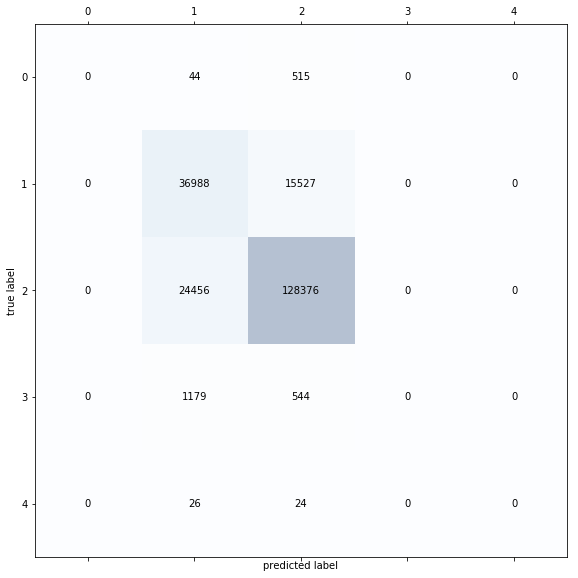

In [35]:
# confusion matrix and compute accuracy, precision, and recall, for all classes (remember 3 classes => 3x3 conf.mat.).
display_confusion(confmat)

In [36]:
#Accuracy score (decision tree)
print(accuracy_score(y_test, y_predict_tree))

0.7962480558939518


In [37]:
print(classification_report(y_test, y_predict_tree))

C:\Users\yosuke\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       559
         2.0       0.59      0.70      0.64     52515
         3.0       0.89      0.84      0.86    152832
         4.0       0.00      0.00      0.00      1723
         5.0       0.00      0.00      0.00        50

    accuracy                           0.80    207679
   macro avg       0.30      0.31      0.30    207679
weighted avg       0.80      0.80      0.80    207679



### Part 4: Report your findings (BI)

In [38]:
validation_y = validation_y.astype(int)

In [39]:
valid_y = validation_y.values

In [40]:
valid_pred_y = model_dt.predict(validation_x)

In [41]:
print(accuracy_score(valid_pred_y,valid_y))

0.332


In [43]:
#dataframe = df[df.index.isin(validation_xx.index)]
y_validation_tree = model_dt.predict(validation_x)
print(accuracy_score(y_validation_tree, validation_y))

0.332


In [58]:
import folium

my_map = folium.Map(location=[55.88207495748612, 10.636574309440173], zoom_start=7)

for x,y in validation_xx.iterrows():
    if y.labels==1:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='blue').add_to(my_map)
    elif y.labels==2:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='yellow').add_to(my_map)
    elif y.labels==3:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='green').add_to(my_map)
    elif y.labels==4:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='purple').add_to(my_map)
    else:
        folium.CircleMarker(location=[y.latitude, y.longitude], radius=2, color='orange').add_to(my_map)     
    
    

my_map.save('ass7dk.html')
my_map

In [ ]:
#for coords4 in zip(validation_xx.longitude.values,validation_xx.latitude.values,validation_xx.price_change_in_pct.values,validation_y.values):
#    folium.CircleMarker(location=[coords4[1], coords4[0], coords4[2], coords4[3]], radius=2, color="red").add_to(my_map)

#for coords4 in zip(validation_xx.longitude.values,validation_xx.latitude.values,validation_xx.price_change_in_pct.values,validation_xx.labels.values):
#    folium.CircleMarker(location=[coords[1], coords[0], coords4[2], coords4[3]], radius=2, color="red").add_to(my_map)
   
    

### Part 5: House Keeping